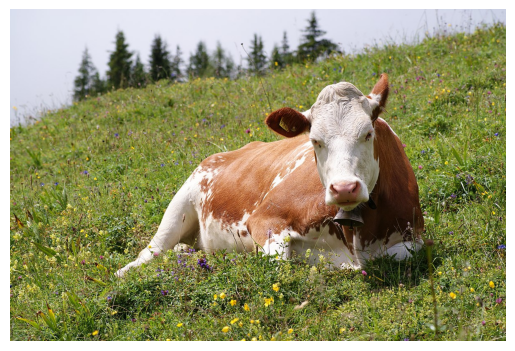

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('cow.jpg')
plt.imshow (data)
plt.axis('off')
plt.show () 

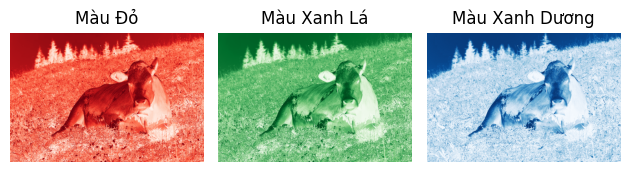

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Nạp ảnh
data = iio.imread('cow.jpg')

# Tách 3 kênh màu 

red_only = data[:, :, 0]
iio.imwrite('cow_red_only.jpg', red_only)
green_only = data[:, :, 1]
iio.imwrite('cow_green_only.jpg', green_only)
blue_only = data[:, :, 2]
iio.imwrite('cow_blue_only.jpg', blue_only)

# Hiển thị ảnh
plt.subplot(1, 3, 1)
plt.imshow(red_only, cmap='Reds')
plt.title("Màu Đỏ")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_only, cmap='Greens')
plt.title("Màu Xanh Lá")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_only, cmap='Blues')
plt.title("Màu Xanh Dương")
plt.axis('off')

plt.tight_layout()
plt.show()


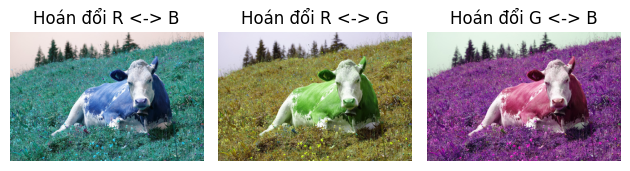

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Nạp ảnh màu
img = iio.imread('cow.jpg')

# Hoán đổi R <-> G
rg_swap = img.copy()
rg_swap[:, :, 0], rg_swap[:, :, 1] = img[:, :, 1], img[:, :, 0]
iio.imwrite('cow_rg_swap.jpg', rg_swap)

# Hoán đổi R <-> B
rb_swap = img.copy()
rb_swap[:, :, 0], rb_swap[:, :, 2] = img[:, :, 2], img[:, :, 0]
iio.imwrite('cow_rb_swap.jpg', rb_swap)

# Hoán đổi G <-> B
gb_swap = img.copy()
gb_swap[:, :, 1], gb_swap[:, :, 2] = img[:, :, 2], img[:, :, 1]
iio.imwrite('cow_gb_swap.jpg', gb_swap)

plt.subplot(1, 3, 1)
plt.imshow(rb_swap)
plt.title("Hoán đổi R <-> B")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rg_swap)
plt.title("Hoán đổi R <-> G")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gb_swap)
plt.title("Hoán đổi G <-> B")
plt.axis('off')

plt.tight_layout()
plt.show()


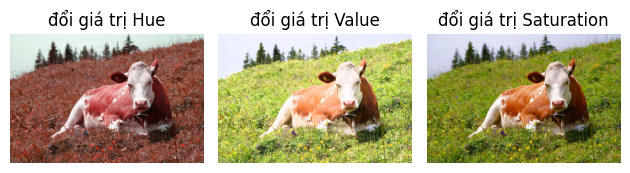

In [1]:
import numpy as np
import imageio.v2 as iio
import colorsys
import matplotlib.pyplot as plt
from PIL import Image

img = iio.imread('cow.jpg') / 255.0
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(img[:, :, 0], img[:, :, 1], img[:, :, 2])
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)

# đổi giá trị Hue
rgb1 = np.array(hsv2rgb(h * h, s, v)).transpose(1, 2, 0)
Image.fromarray((rgb1 * 255).astype(np.uint8)).save('cow_hue.png')

# đổi giá trị Value
rgb2 = np.array(hsv2rgb(h, s, np.clip(v * 1.5, 0, 1))).transpose(1, 2, 0)
Image.fromarray((rgb2 * 255).astype(np.uint8)).save('cow_value.png')

# đổi giá trị Saturation
rgb3 = np.array(hsv2rgb(h, np.clip(s * 1.5, 0, 1), v)).transpose(1, 2, 0)
Image.fromarray((rgb3 * 255).astype(np.uint8)).save('cow_saturation.png')
 
plt.subplot(1, 3, 1)
plt.imshow(rgb1)
plt.title("đổi giá trị Hue")
plt.axis('off')  

plt.subplot(1, 3, 2)
plt.imshow(rgb2)
plt.title("đổi giá trị Value")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb3)
plt.title("đổi giá trị Saturation")
plt.axis('off')

plt.tight_layout()
plt.show()



(np.float64(-0.5), np.float64(1199.5), np.float64(802.5), np.float64(-0.5))

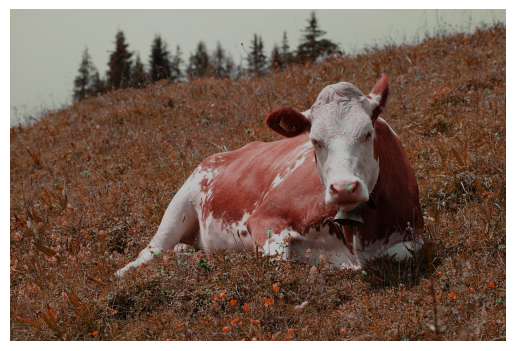

In [ ]:
import numpy as np
import imageio.v2 as iio
import colorsys
from PIL import Image


img = iio.imread('cow.jpg') / 255.0


rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(img[:, :, 0], img[:, :, 1], img[:, :, 2])

# Gán giá trị
h_new = h / 3   
v_new = v * 0.75

hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb_new = np.array(hsv2rgb(h_new, s, v_new)).transpose(1, 2, 0)
Image.fromarray((rgb_new * 255).astype(np.uint8)).save('cow_modified.png')  

plt.imshow(rgb_new)
plt.axis('off')

(np.float64(-0.5), np.float64(217.5), np.float64(230.5), np.float64(-0.5))

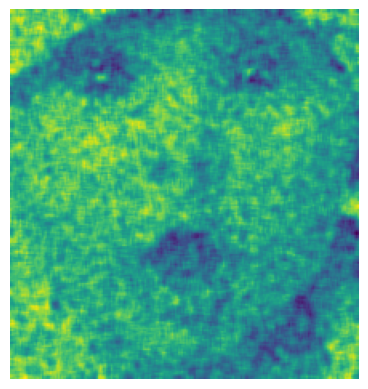

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('baby.jpeg',  mode='L')
k = np.ones((5,5)) /25
x = sn.convolve(a,k).astype(np.uint8)
iio.imsave('baby_mean_filter.jpeg', x)

plt.imshow(x)
plt.axis('off')




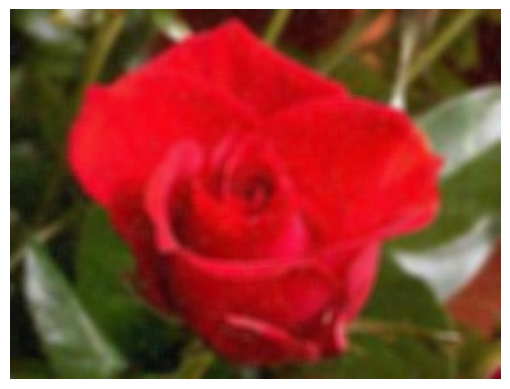

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt


a = iio.imread('flower.jpeg') 
k = np.ones((5, 5)) / 25

x_r = sn.convolve(a[:, :, 0], k)
x_g = sn.convolve(a[:, :, 1], k)
x_b = sn.convolve(a[:, :, 2], k)

x_filtered = np.stack([x_r, x_g, x_b], axis=2).astype(np.uint8)
iio.imsave('flower_mean_filter.jpeg', x_filtered)

plt.imshow(x_filtered)
plt.axis('off')
plt.show()


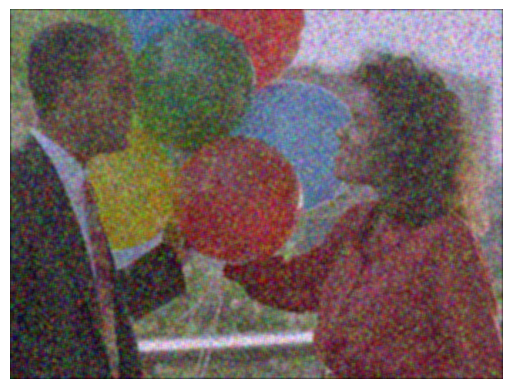

In [ ]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sn


img = iio.imread('balloons_noisy.png')
kernel = np.ones((5, 5)) / 25

filtered = np.zeros_like(img)
for i in range(3): 
    filtered[:, :, i] = sn.convolve(img[:, :, i], kernel, mode='same')


plt.imshow(filtered.astype(np.uint8))

plt.axis('off')
plt.show()
